In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

data = datasets.load_diabetes()
df = pd.DataFrame(data["data"], index=data["target"], columns=data["feature_names"])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


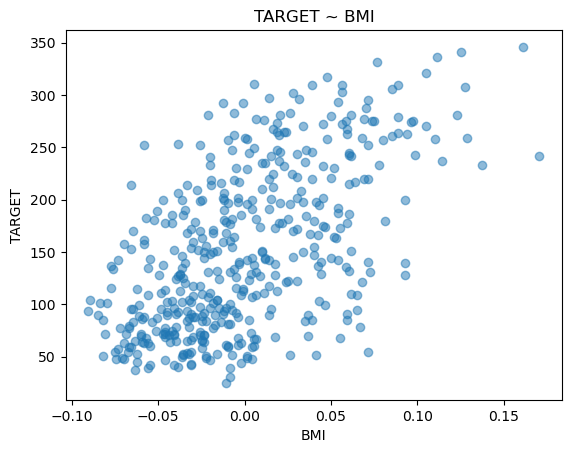

In [2]:
X = df.bmi.values
Y = df.index.values

plt.scatter(X, Y, alpha=0.5)
plt.title("TARGET ~ BMI")
plt.xlabel("BMI")
plt.ylabel("TARGET")
plt.show()

In [3]:
cov = (np.sum(X * Y) - len(X) * np.mean(X) * np.mean(Y)) / len(X)
cov

2.1480435755297007

In [4]:
cov = np.cov(X, Y)
cov

array([[2.26757370e-03, 2.15291442e+00],
       [2.15291442e+00, 5.94333135e+03]])

In [5]:
corr = cov / (np.std(X) * np.std(Y))
corr

array([[6.19083763e-04, 5.87779953e-01],
       [5.87779953e-01, 1.62262419e+03]])

In [6]:
corr = np.corrcoef(X,Y)
corr

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [47]:
from scipy.stats import pearsonr

pval = pearsonr(X, Y)[1]
pval

3.4660064451655095e-42

In [45]:
with pd.option_context("display.float_format", '{:.4f}'.format):
    display(df.corr())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.0000,0.1737,0.1851,0.3354,0.2601,0.2192,-0.0752,0.2038,0.2708,0.3017
sex,0.1737,1.0000,0.0882,0.2410,0.0353,0.1426,-0.3791,0.3321,0.1499,0.2081
bmi,0.1851,0.0882,1.0000,0.3954,0.2498,0.2612,-0.3668,0.4138,0.4462,0.3887
bp,0.3354,0.2410,0.3954,1.0000,0.2425,0.1856,-0.1788,0.2577,0.3935,0.3904
s1,0.2601,0.0353,0.2498,0.2425,1.0000,0.8967,0.0515,0.5422,0.5155,0.3257
s2,0.2192,0.1426,0.2612,0.1856,0.8967,1.0000,-0.1965,0.6598,0.3184,0.2906
s3,-0.0752,-0.3791,-0.3668,-0.1788,0.0515,-0.1965,1.0000,-0.7385,-0.3986,-0.2737
s4,0.2038,0.3321,0.4138,0.2577,0.5422,0.6598,-0.7385,1.0000,0.6179,0.4172
s5,0.2708,0.1499,0.4462,0.3935,0.5155,0.3184,-0.3986,0.6179,1.0000,0.4647
s6,0.3017,0.2081,0.3887,0.3904,0.3257,0.2906,-0.2737,0.4172,0.4647,1.0000


<AxesSubplot: >

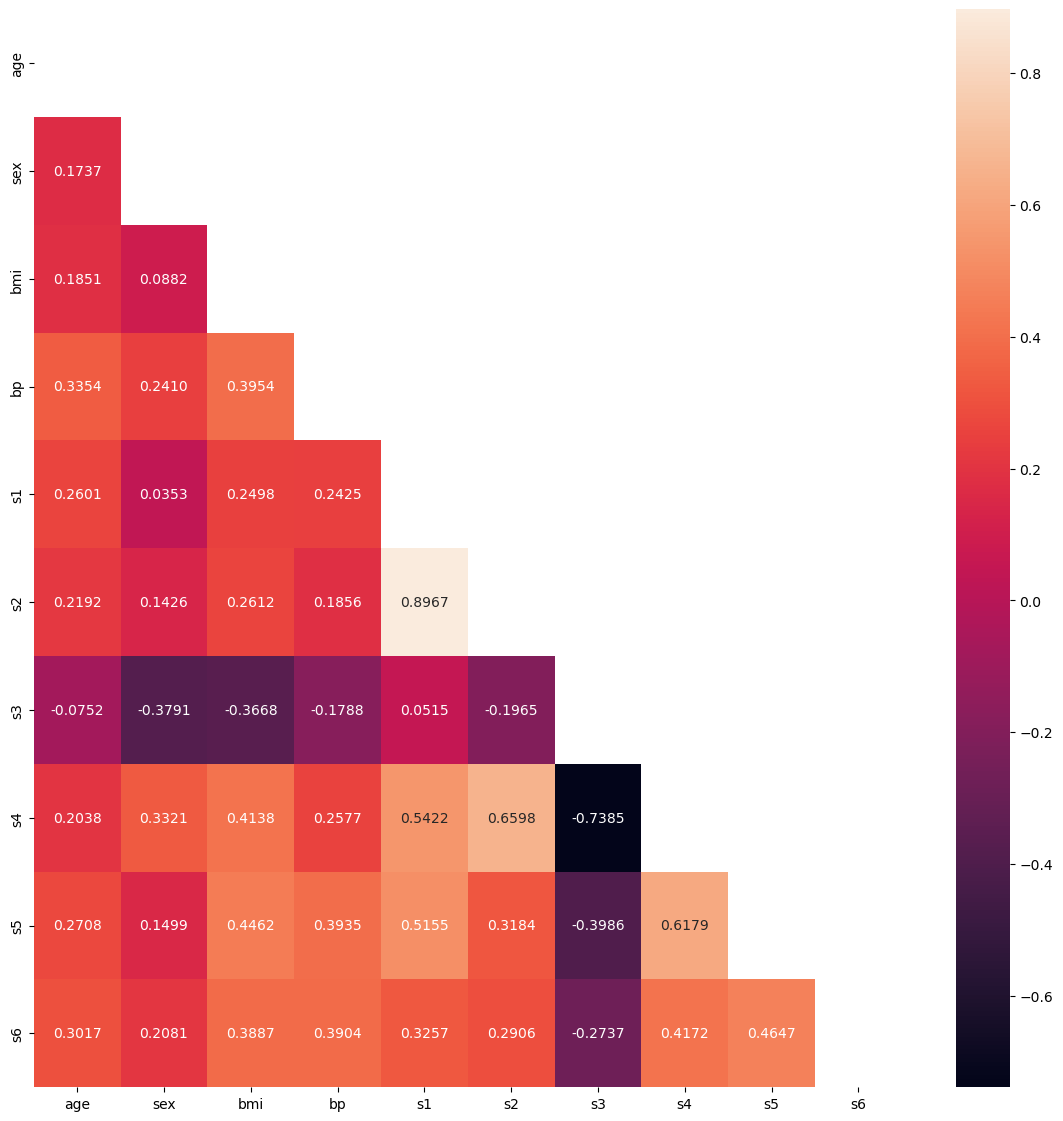

In [20]:
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 14))
sns.heatmap(data=df.corr(), annot=True, fmt=".4f", mask=mask)

In [43]:
from scipy.stats import pearsonr

# pd.options.display.float_format = '{:.5f}'.format

with pd.option_context("display.float_format", '{:.4f}'.format):
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1])
    display(pval)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.0000,0.0002,0.0001,0.0000,0.0000,0.0000,0.1145,0.0000,0.0000,0.0000
sex,0.0002,1.0000,0.0640,0.0000,0.4594,0.0026,0.0000,0.0000,0.0016,0.0000
bmi,0.0001,0.0640,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
bp,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.0002,0.0000,0.0000,0.0000
s1,0.0000,0.4594,0.0000,0.0000,1.0000,0.0000,0.2798,0.0000,0.0000,0.0000
s2,0.0000,0.0026,0.0000,0.0001,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
s3,0.1145,0.0000,0.0000,0.0002,0.2798,0.0000,1.0000,0.0000,0.0000,0.0000
s4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
s5,0.0000,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
s6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.0000,0.0002,0.0001,0.0000,0.0000,0.0000,0.1145,0.0000,0.0000,0.0000
sex,0.0002,1.0000,0.0640,0.0000,0.4594,0.0026,0.0000,0.0000,0.0016,0.0000
bmi,0.0001,0.0640,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
bp,0.0000,0.0000,0.0000,1.0000,0.0000,0.0001,0.0002,0.0000,0.0000,0.0000
s1,0.0000,0.4594,0.0000,0.0000,1.0000,0.0000,0.2798,0.0000,0.0000,0.0000
s2,0.0000,0.0026,0.0000,0.0001,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
s3,0.1145,0.0000,0.0000,0.0002,0.2798,0.0000,1.0000,0.0000,0.0000,0.0000
s4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
s5,0.0000,0.0016,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
s6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


<AxesSubplot: >

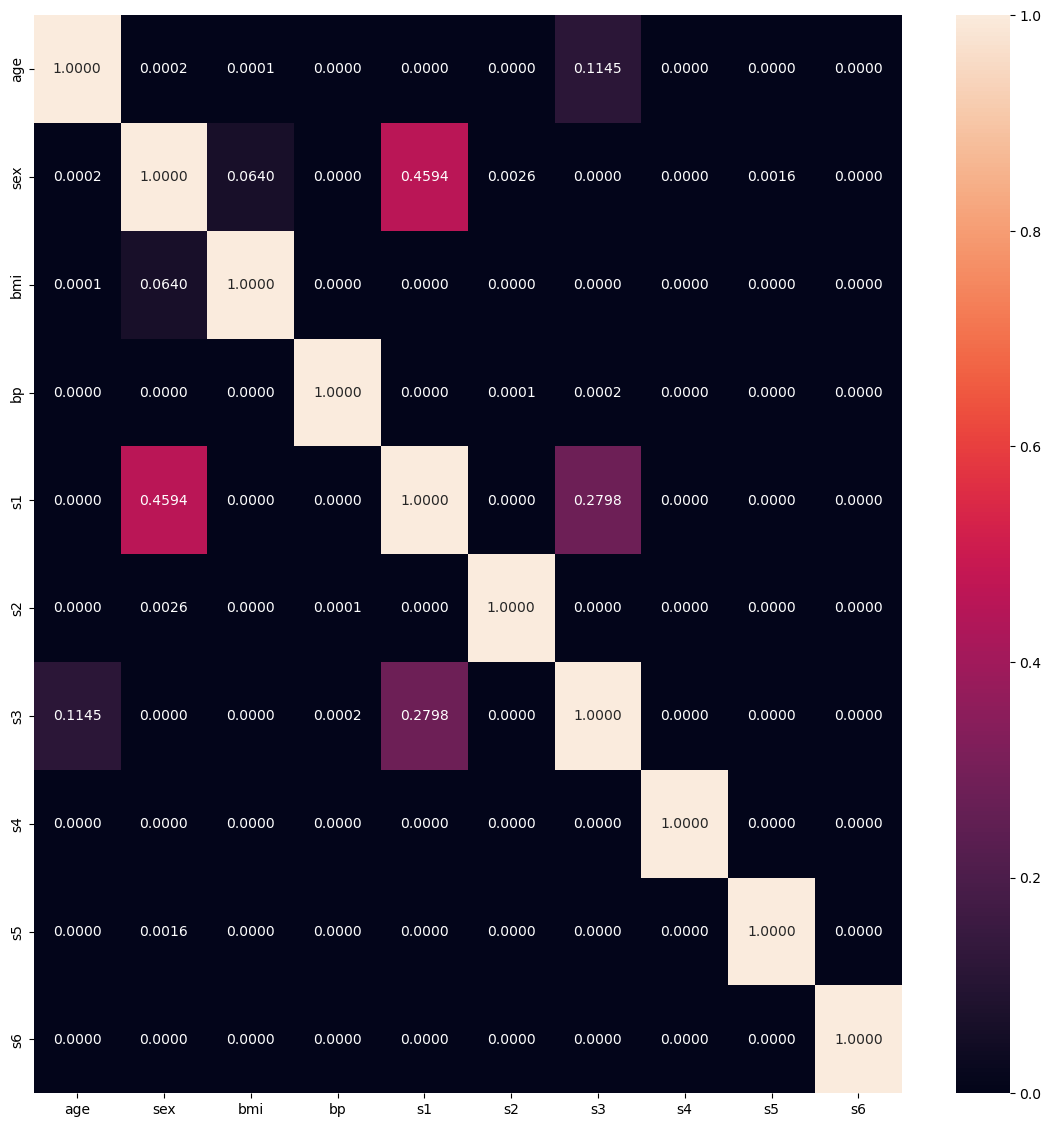

In [73]:
from scipy.stats import pearsonr

# pd.options.display.float_format = '{:.5f}'.format

with pd.option_context("display.float_format", '{:.4f}'.format):
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1])
    display(pval)
    
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 14))
sns.heatmap(data=pval, annot=True, fmt=".4f")